## Data Preprocessing

In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
import joblib

In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

read_path = os.path.join(BASE_DIR, 'data', 'clean_medical_appointment_data.csv')
df = pd.read_csv(read_path)

In [3]:
X = df.drop(columns = ['no_show'])
y = df['no_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9999)

In [4]:
# Convert gender into separate 'male' and 'female' columns using one hot encoding
X_train = pd.get_dummies(X_train, columns=['gender'], prefix='', prefix_sep='')
X_train['male'] = X_train['male'].astype('int64')
X_train['female'] = X_train['female'].astype('int64')

X_test = pd.get_dummies(X_test, columns=['gender'], prefix='', prefix_sep='')
X_test['male'] = X_test['male'].astype('int64')
X_test['female'] = X_test['female'].astype('int64')

In [5]:
age_scaler = MinMaxScaler()

X_train['age'] = np.log1p(X_train['age'])
X_train['age'] = age_scaler.fit_transform(X_train[['age']])

X_test['age'] = np.log1p(X_test['age'])
X_test['age'] = age_scaler.transform(X_test[['age']])

assets_path = os.path.join(BASE_DIR, 'assets', 'age_scaler.pkl')
joblib.dump(age_scaler, assets_path);

In [6]:
# Combine less frequent neighborhoods into one category
neighborhood_mapping = {neighborhood: neighborhood if count >= 50 else 'Other' for neighborhood, count in X_train['neighborhood'].value_counts().items()}

X_train['neighborhood'] = X_train['neighborhood'].map(neighborhood_mapping)

X_test['neighborhood'] = X_test['neighborhood'].map(neighborhood_mapping)

assets_path = os.path.join(BASE_DIR, 'assets', 'neighborhood_mapping.pkl')
joblib.dump(neighborhood_mapping, assets_path);

# Apply binary encoding to label neighborhoods
neighborhood_encoder = ce.BinaryEncoder(cols = ['neighborhood'])

train_neighborhoods = neighborhood_encoder.fit_transform(X_train['neighborhood'])
X_train = pd.concat([X_train.drop('neighborhood', axis = 1), train_neighborhoods], axis = 1)

test_neighborhoods = neighborhood_encoder.fit_transform(X_test['neighborhood'])
X_test = pd.concat([X_test.drop('neighborhood', axis = 1), test_neighborhoods], axis = 1)

assets_path = os.path.join(BASE_DIR, 'assets', 'neighborhood_encoder.pkl')
joblib.dump(neighborhood_encoder, assets_path);

In [7]:
# Convert appointment month into separate 'april', 'may', and 'june' columns using one hot encoding
train_months = pd.get_dummies(X_train['appointment_month'], prefix = '', drop_first = False).astype('int64')
train_months.columns = ['april', 'may', 'june']
X_train = pd.concat([X_train.drop('appointment_month', axis = 1), train_months], axis = 1)

test_months = pd.get_dummies(X_test['appointment_month'], prefix = '', drop_first = False).astype('int64')
test_months.columns = ['april', 'may', 'june']
X_test = pd.concat([X_test.drop('appointment_month', axis = 1), test_months], axis = 1)

In [8]:
# Convert appointment day of week into separate columns using one hot encoding
train_days_of_week = pd.get_dummies(X_train['appointment_day_of_week'], prefix = '', drop_first = False).astype('int64')
train_days_of_week.columns = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
X_train = pd.concat([X_train.drop('appointment_day_of_week', axis = 1), train_days_of_week], axis = 1)

test_days_of_week = pd.get_dummies(X_test['appointment_day_of_week'], prefix = '', drop_first = False).astype('int64')
test_days_of_week.columns = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
X_test = pd.concat([X_test.drop('appointment_day_of_week', axis = 1), test_days_of_week], axis = 1)

In [9]:
previous_no_shows_scaler = MinMaxScaler()

X_train['previous_no_shows'] = np.log1p(X_train['previous_no_shows'])
X_train['previous_no_shows'] = previous_no_shows_scaler.fit_transform(X_train[['previous_no_shows']])

X_test['previous_no_shows'] = np.log1p(X_test['previous_no_shows'])
X_test['previous_no_shows'] = previous_no_shows_scaler.transform(X_test[['previous_no_shows']])

assets_path = os.path.join(BASE_DIR, 'assets', 'previous_no_shows_scaler.pkl')
joblib.dump(previous_no_shows_scaler, assets_path);

In [10]:
day_difference_scaler = MinMaxScaler()

X_train['day_difference'] = np.log1p(X_train['day_difference'])
X_train['day_difference'] = day_difference_scaler.fit_transform(X_train[['day_difference']])

X_test['day_difference'] = np.log1p(X_test['day_difference'])
X_test['day_difference'] = day_difference_scaler.transform(X_test[['day_difference']])

assets_path = os.path.join(BASE_DIR, 'assets', 'day_difference_scaler.pkl')
joblib.dump(day_difference_scaler, assets_path);

In [11]:
X_train, X_test = X_train.align(X_test, join = 'left', axis = 1, fill_value = 0)

assets_path = os.path.join(BASE_DIR, 'assets', 'feature_columns.pkl')
joblib.dump(X_train.columns.tolist(), assets_path);

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22097 entries, 66395 to 35224
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                22097 non-null  float64
 1   scholarship        22097 non-null  int64  
 2   hypertension       22097 non-null  int64  
 3   diabetes           22097 non-null  int64  
 4   alcoholism         22097 non-null  int64  
 5   handicap           22097 non-null  int64  
 6   previous_no_shows  22097 non-null  float64
 7   day_difference     22097 non-null  float64
 8   sms_received       22097 non-null  int64  
 9   female             22097 non-null  int64  
 10  male               22097 non-null  int64  
 11  neighborhood_0     22097 non-null  int64  
 12  neighborhood_1     22097 non-null  int64  
 13  neighborhood_2     22097 non-null  int64  
 14  neighborhood_3     22097 non-null  int64  
 15  neighborhood_4     22097 non-null  int64  
 16  neighborhood_5     2209

## Model Training and Evaluation

### Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Validation Metrics Across Classification Thresholds:
Threshold 0.3 - Accuracy 0.744, Precision 0.572, Recall 0.714, F1 Score 0.635, AUC-ROC 0.736
Threshold 0.4 - Accuracy 0.778, Precision 0.648, Recall 0.634, F1 Score 0.641, AUC-ROC 0.739
Threshold 0.5 - Accuracy 0.801, Precision 0.738, Recall 0.561, F1 Score 0.638, AUC-ROC 0.735
Threshold 0.6 - Accuracy 0.806, Precision 0.819, Recall 0.487, F1 Score 0.611, AUC-ROC 0.719
Threshold 0.7 - Accuracy 0.795, Precision 0.882, Recall 0.395, F1 Score 0.546, AUC-ROC 0.686
Threshold 0.8 - Accuracy 0.766, Precision 0.941, Recall 0.268, F1 Score 0.418, AUC-ROC 0.630


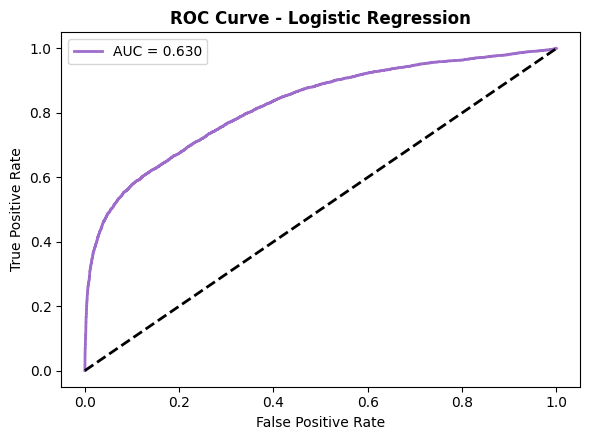

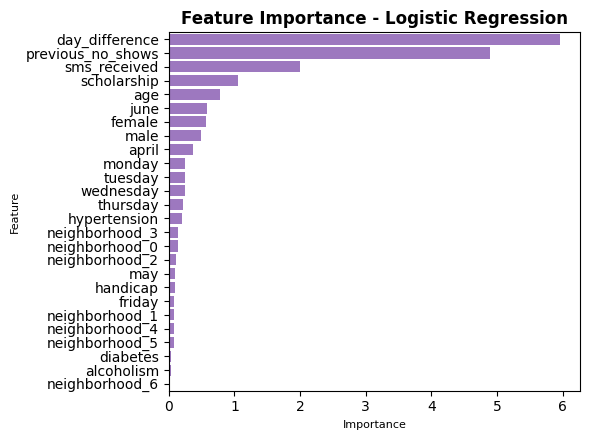

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Training
lr = LogisticRegression(solver = 'liblinear', random_state = 999)

parameter_options = {
    'C': [0.0001, 0.001, 0.005, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty': ['l1', 'l2']
}

kf = KFold(n_splits = 5, shuffle = True, random_state = 999)

grid_search = GridSearchCV(
    estimator = lr,
    param_grid = parameter_options,
    cv = kf,
    scoring = 'f1',
    verbose = 1,
    n_jobs = -1
)
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_
print('\nBest Hyperparameters:', grid_search.best_params_)

# Validation
proba = best_lr.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

print('Validation Metrics Across Classification Thresholds:')
best_f1 = 0
best_threshold = None

for threshold in thresholds:
    y_pred = (proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

for threshold in thresholds:
    y_pred = (proba >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    if threshold == best_threshold:
        print(f'\033[31mThreshold {threshold:.1f} - Accuracy {accuracy:.3f}, '
              f'Precision {precision:.3f}, Recall {recall:.3f}, '
              f'F1 Score {f1:.3f}, AUC-ROC {auc_roc:.3f}\033[0m')
    else:
        print(f'Threshold {threshold:.1f} - Accuracy {accuracy:.3f}, '
              f'Precision {precision:.3f}, Recall {recall:.3f}, '
              f'F1 Score {f1:.3f}, AUC-ROC {auc_roc:.3f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6, 4.5))

plt.plot(fpr, tpr, color='#9E6CCB', linewidth=2, label=f'AUC = {auc_roc:.3f}')  # purple
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2)
plt.title('ROC Curve - Logistic Regression', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

# Feature Importance
importance = np.abs(best_lr.coef_[0])
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(6, 4.5))

sns.barplot(data=importance_df, x='Importance', y='Feature', color='#9E6CCB')
plt.title('Feature Importance - Logistic Regression', fontsize=12, weight='bold')
plt.xlabel('Importance', fontsize=8)
plt.ylabel('Feature', fontsize=8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### Deep Neural Network

553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
691/691 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
Validation Metrics Across Classification Thresholds:
Threshold 0.3 - Accuracy 0.714, Precision 0.527, Recall 0.805, F1 Score 0.637, AUC-ROC 0.739
Threshold 0.4 - Accuracy 0.833, Precision 0.851, Recall 0.562, F1 Score 0.677, AUC-ROC 0.759
Threshold 0.5 - Accuracy 0.835, Precision 0.922, Recall 0.517, F1 Score 0.662, AUC-ROC 0.748
Threshold 0.6 - Accuracy 0.832, Precision 0.960, Recall 0.483, F1 Score 0.643, AUC-ROC 0.737
Threshold 0.7 - Accuracy 0.826, Precision 0.976, Recall 0.454, F1 Score 0.620, AUC-ROC 0.725
Threshold 0.8 - Accuracy 0.818, Precision 0.984, Recall 0.425, F1 Score 0.594, AUC-ROC 0.711


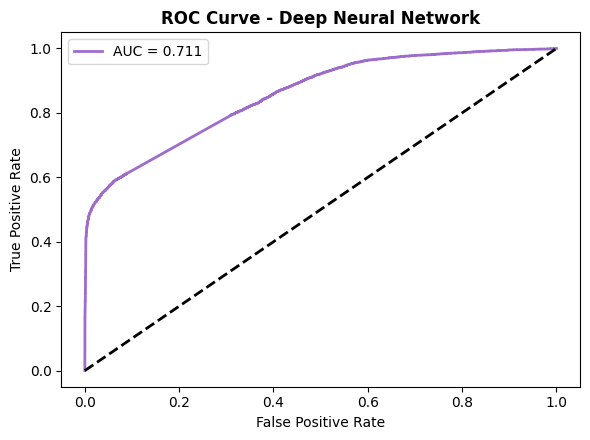

In [14]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Custom Neural Network Training
def create_model():
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1],)))  

    model.add(Dense(64, activation = 'relu'))      
    model.add(Dropout(0.4))
    
    model.add(Dense(32, activation = 'relu'))      
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation = 'sigmoid'))    
    model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['AUC'])
    return model


skf = StratifiedKFold(n_splits = 5)

best_dnn = None
best_f1 = 0

for train_index, test_index in skf.split(X_train, y_train):
    X_train_k, X_test_k = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_k, y_test_k = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model = create_model()
    model.fit(X_train_k, y_train_k, epochs = 50, batch_size = 32, verbose = 0)
    
    y_pred_class_k = (model.predict(X_test_k) > 0.5).astype(int)
    f1 = f1_score(y_test_k, y_pred_class_k)

    if f1 > best_f1:
        best_f1 = f1
        best_dnn = model

# Validation
proba = best_dnn.predict(X_test)

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
        
print('Validation Metrics Across Classification Thresholds:')
best_f1 = 0
best_threshold = None

for threshold in thresholds:
    y_pred = (proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

for threshold in thresholds:
    y_pred = (proba >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    if threshold == best_threshold:
        print(f'\033[31mThreshold {threshold:.1f} - Accuracy {accuracy:.3f}, '
              f'Precision {precision:.3f}, Recall {recall:.3f}, '
              f'F1 Score {f1:.3f}, AUC-ROC {auc_roc:.3f}\033[0m')
    else:
        print(f'Threshold {threshold:.1f} - Accuracy {accuracy:.3f}, '
              f'Precision {precision:.3f}, Recall {recall:.3f}, '
              f'F1 Score {f1:.3f}, AUC-ROC {auc_roc:.3f}')

# ROC curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6, 4.5))

plt.plot(fpr, tpr, color='#9E6CCB', linewidth=2, label=f'AUC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2)
plt.title('ROC Curve - Deep Neural Network', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

### Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 20, 'bootstrap': True}
Validation Metrics Across Classification Thresholds:
Threshold 0.3 - Accuracy 0.774, Precision 0.617, Recall 0.724, F1 Score 0.666, AUC-ROC 0.760
Threshold 0.4 - Accuracy 0.830, Precision 0.806, Recall 0.601, F1 Score 0.688, AUC-ROC 0.768
Threshold 0.5 - Accuracy 0.844, Precision 0.933, Recall 0.539, F1 Score 0.683, AUC-ROC 0.761
Threshold 0.6 - Accuracy 0.842, Precision 0.968, Recall 0.510, F1 Score 0.668, AUC-ROC 0.751
Threshold 0.7 - Accuracy 0.837, Precision 0.983, Recall 0.487, F1 Score 0.651, AUC-ROC 0.741
Threshold 0.8 - Accuracy 0.828, Precision 0.988, Recall 0.455, F1 Score 0.623, AUC-ROC 0.726


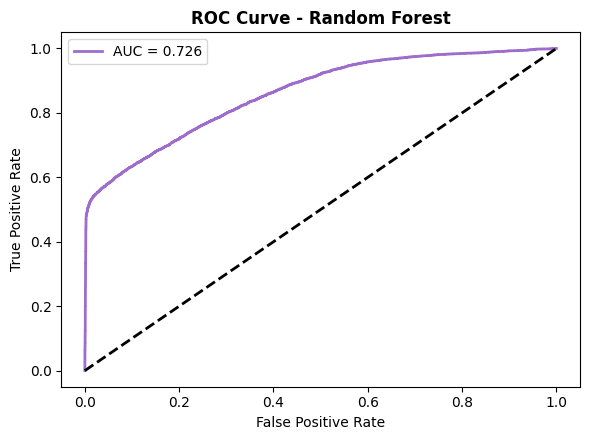

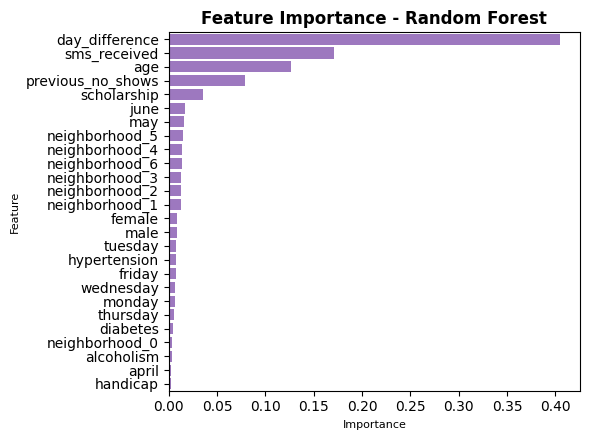

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Training
rfc = RandomForestClassifier(random_state = 999)

parameter_options = {
    'n_estimators': [50, 75, 100],
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7],
    'bootstrap': [True]
}

kf = KFold(n_splits = 5, shuffle = True, random_state = 999)

random_search = RandomizedSearchCV(
    estimator = rfc,
    param_distributions = parameter_options,
    n_iter = 10,
    cv = kf,
    scoring = 'f1',
    verbose = 1,
    random_state = 999,
    n_jobs = -1
)
random_search.fit(X_train, y_train)
best_rfc = random_search.best_estimator_
print('\nBest Hyperparameters:', random_search.best_params_)

# Validation
y_pred = best_rfc.predict(X_test)
proba = best_rfc.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

print('Validation Metrics Across Classification Thresholds:')
best_f1 = 0
best_threshold = None

for threshold in thresholds:
    y_pred = (proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Second pass: print results with highlighting
for threshold in thresholds:
    y_pred = (proba >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    if threshold == best_threshold:
        print(f'\033[31mThreshold {threshold:.1f} - Accuracy {accuracy:.3f}, '
              f'Precision {precision:.3f}, Recall {recall:.3f}, '
              f'F1 Score {f1:.3f}, AUC-ROC {auc_roc:.3f}\033[0m')
    else:
        print(f'Threshold {threshold:.1f} - Accuracy {accuracy:.3f}, '
              f'Precision {precision:.3f}, Recall {recall:.3f}, '
              f'F1 Score {f1:.3f}, AUC-ROC {auc_roc:.3f}')

# ROC curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6, 4.5))

plt.plot(fpr, tpr, color='#9E6CCB', linewidth=2, label=f'AUC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2)
plt.title('ROC Curve - Random Forest', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

# Feature Importance
importance = best_rfc.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (6, 4.5))
sns.barplot(data = importance_df, x = 'Importance', y = 'Feature', color = '#9E6CCB')
plt.title('Feature Importance - Random Forest', fontsize = 12, weight = 'bold')
plt.xlabel('Importance', fontsize = 8)
plt.ylabel('Feature', fontsize = 8)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.tight_layout()
plt.show()

In [16]:
assets_path = os.path.join(BASE_DIR, 'assets', 'rfc.pkl')
joblib.dump(best_rfc, assets_path);